In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [5]:
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置英文字体为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 8  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [6]:
def data_prepare(file):
    df = pd.read_csv(file, encoding='gbk')
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    df = df.resample('M', on='销售日期').sum()
    df['日期'] = df.index
    name = df.columns
    df1 = pd.DataFrame(np.array(df))
    df1.columns = name
    return df1

df1 = data_prepare("data_1\\按类别划分附件2\\花菜类.csv").drop("销售单价(元/千克)", axis=1)
df2 = data_prepare("data_1\\按类别划分附件2\\花叶类.csv").drop("销售单价(元/千克)", axis=1)
df3 = data_prepare("data_1\\按类别划分附件2\\茄类.csv").drop("销售单价(元/千克)", axis=1)
df4 = data_prepare("data_1\\按类别划分附件2\\辣椒类.csv").drop("销售单价(元/千克)", axis=1)
df5 = data_prepare("data_1\\按类别划分附件2\\食用菌.csv").drop("销售单价(元/千克)", axis=1)
df6 = data_prepare("data_1\\按类别划分附件2\\水生根茎类.csv").drop("销售单价(元/千克)", axis=1)

C:\Users\jack\AppData\Local\Temp\ipykernel_7316\2230078192.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_7316\2230078192.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M', on='销售日期').sum()
C:\Users\jack\AppData\Local\Temp\ipykernel_7316\2230078192.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resam

In [7]:
df1.head()

,销量(千克),日期
0,1522.555,2020-07-31
1,1748.658,2020-08-31
2,1336.066,2020-09-30
3,1644.963,2020-10-31
4,1943.391,2020-11-30


In [8]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.columns = ["花菜类", "日期", "花叶类", "日期",  "茄类", "日期",  "辣椒类", "日期",  "食用菌", "日期",  "水生根茎类", "日期"]
df.head()

,花菜类,日期,花叶类,日期,茄类,日期,辣椒类,日期,食用菌,日期,水生根茎类,日期
0,1522.555,2020-07-31,6577.078,2020-07-31,1365.551,2020-07-31,2198.049,2020-07-31,1617.836,2020-07-31,332.056,2020-07-31
1,1748.658,2020-08-31,7261.517,2020-08-31,1139.393,2020-08-31,2822.344,2020-08-31,1636.524,2020-08-31,867.18,2020-08-31
2,1336.066,2020-09-30,5668.902,2020-09-30,671.692,2020-09-30,1992.413,2020-09-30,1642.881,2020-09-30,798.931,2020-09-30
3,1644.963,2020-10-31,6395.312,2020-10-31,771.967,2020-10-31,1908.944,2020-10-31,3000.532,2020-10-31,1344.118,2020-10-31
4,1943.391,2020-11-30,6518.569,2020-11-30,432.389,2020-11-30,1837.705,2020-11-30,3281.028,2020-11-30,960.695,2020-11-30


In [9]:
df_final = pd.DataFrame(np.array(df[["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]]))
df_final.columns = ["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]
df_final = df_final.astype("float")

## 斯皮尔曼相关系数矩阵生成

In [10]:
correlation = df_final.corr("spearman")
correlation.head()

,花菜类,花叶类,茄类,辣椒类,食用菌,水生根茎类
花菜类,1.000000,0.694723,0.076190,0.310167,0.462291,0.426770
花叶类,0.694723,1.000000,-0.043243,0.487773,0.578121,0.447876
茄类,0.076190,-0.043243,1.000000,-0.169627,-0.446847,-0.466667
辣椒类,0.310167,0.487773,-0.169627,1.000000,0.490347,0.316345
食用菌,0.462291,0.578121,-0.446847,0.490347,1.000000,0.669241


## 斯皮尔曼相关性检验

In [11]:
def p_spearman(data):
    # 计算Spearman相关性检验的p值矩阵
    corr_matrix = np.zeros((len(data.columns), len(data.columns)))

    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i == j:
                continue
            rho, p_value = spearmanr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = p_value

    # 将p值矩阵转换为数据框，以便使用seaborn绘制热力图
    p_value_matrix = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)

    return p_value_matrix

p_values_matrix = p_spearman(df_final)

## 数据可视化


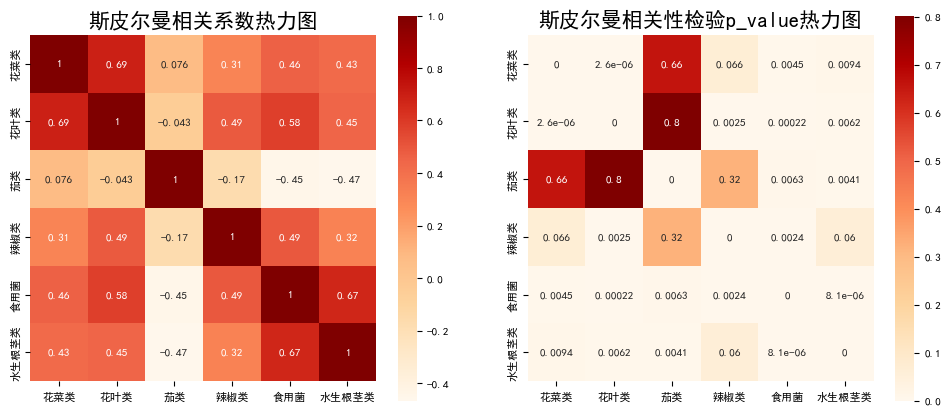

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.2)               # 同一列元素之间距离

sns.heatmap(data=correlation, annot=True, cmap="OrRd", square=True, 
            xticklabels=correlation.columns, yticklabels=correlation.columns, ax=ax[0])
sns.heatmap(data=p_values_matrix, annot=True, cmap="OrRd", square=True,
            xticklabels=df_final.columns, yticklabels=df_final.columns, ax=ax[1])

ax[0].set_title("斯皮尔曼相关系数热力图", fontsize=15)
ax[1].set_title("斯皮尔曼相关性检验p_value热力图", fontsize=15)

plt.savefig('绘图文件夹\\正文图4.eps')